# Plotting the gender pay gap

-- Atanasiu Stefan Demian -- 

This Jupyter Notebook provides a simple Python script which plots the gender pay gap by grouping the income of male and female employees by a selected criterion (e.g. age, education, seniority etc.). Below is the definition of the $\textbf{PayGapVisualizer}$ class. It takes as input 2 parameters: a pandas DataFrame "data" (which can be created from a .csv or .xlsx file) containing information about the gender, department, seniority, education, age, tenure, weekly pay and FTE of each member of the organisation or company, and the weekly work hours. This script does not take into account bonuses.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class PayGapVisualizer(object):
    def __init__(self, data, weeklyWorkHours):
        self.data=data
        self.wwk=weeklyWorkHours
        self.males=data[data.Gender=='Male']
        self.females=data[data.Gender=='Female']
        
    def plotPayGap(self, column):
        """
        Plot the gender pay gap by grouping the members of the organisation according to the selected column in the pandas 
        DataFrame, or by quartile.
        type column : str
        column: 'FTE', 'Department', 'Age', 'Seniority', 'Education', 'Tenure', 'Quartile'
        """
        plt.figure(figsize=(8,6))
        ticks=self.setTicks(column)
        plt.bar(range(len(ticks)), self.getPayGap(column)['mean'], align='edge', width=0.3, color='blue', label='Mean')
        plt.bar(range(len(ticks)), self.getPayGap(column)['median'], align='edge', width=-0.3, color='green', label='Median')
        plt.ylabel('Hourly Pay Gap (%)')
        plt.xticks(range(len(ticks)), ticks, size='small')
        plt.title('Pay Gap by %s' % column)
        plt.legend(loc='best')
        plt.show()
        
    def plotWorkForce(self, column):
        """
        Plot the workforce by grouping the members of the organisation according to the selected column in the pandas 
        dataFrame, or by quartile.
        type column : str
        column: 'FTE', 'Department', 'Age', 'Seniority', 'Education', 'Tenure', 'Quartile'
        """
        plt.figure(figsize=(8,6))
        ticks=self.setTicks(column)
        plt.bar(range(len(ticks)), self.workForce(column)['males'], align='edge', width=0.3, color='blue', label='Males')
        plt.bar(range(len(ticks)), self.workForce(column)['females'], align='edge', width=-0.3, color='red', label='Females')
        plt.ylabel('Workforce')
        plt.xticks(range(len(ticks)), ticks, size='small')
        plt.title('Work Force by %s' % column)
        plt.legend(loc='best')
        plt.show()
        
    def getPayGap(self, column):
        """
        Compute the mean and median pay gap for each element of column.
        """
        Mean, Median=[], []
        if column=='Quartile':
            qts=[np.percentile(self.data.WeeklyPay,p) for p in [0,25,50,75,100]]
            for i in range(4):
                pay_gap=self.indexData('WeeklyPay', qts[i], qts[i+1])
                Mean.append((pay_gap['male_mean']-pay_gap['female_mean'])*100/pay_gap['male_mean'])
                Median.append((pay_gap['male_median']-pay_gap['female_median'])*100/pay_gap['male_median'])
        elif column=='Age':
            ages=[0,20,30,40,50, float('inf')]
            for i in range(5):
                pay_gap=self.indexData(column, ages[i], ages[i+1])
                Mean.append((pay_gap['male_mean']-pay_gap['female_mean'])*100/pay_gap['male_mean'])
                Median.append((pay_gap['male_median']-pay_gap['female_median'])*100/pay_gap['male_median'])
        elif column=='Tenure':
            lgts=[0,1,3,10,20,float('inf')]
            for i in range(5):
                pay_gap=self.indexData(column, lgts[i], lgts[i+1])
                Mean.append((pay_gap['male_mean']-pay_gap['female_mean'])*100/pay_gap['male_mean'])
                Median.append((pay_gap['male_median']-pay_gap['female_median'])*100/pay_gap['male_median'])
        else:
            levels=self.data[column].unique()
            for lvl in levels:
                pay_gap=self.indexData(column, lvl)
                Mean.append((pay_gap['male_mean']-pay_gap['female_mean'])*100/pay_gap['male_mean'])
                Median.append((pay_gap['male_median']-pay_gap['female_median'])*100/pay_gap['male_median'])
        return {'mean':Mean, 'median':Median}
     
    def setTicks(self, column):
        if column=='Quartile':
            qts=[str(round(np.percentile(self.data.WeeklyPay,p)/self.wwk,1)) for p in [0,25,50,75,100]]
            return [''.join([qts[0],'-',qts[1]]), ''.join([qts[1],'-',qts[2]]), ''.join([qts[2],'-',qts[3]]), ''.join([qts[3],'-',qts[4]])]
        elif column=='Age':
            return ['<20', '20-30', '30-40', '40-50', '50+']
        elif column=='Tenure':
            return ['<1 yr', '1-3 yrs', '3-10 yrs', '10-20 yrs', '>20 yrs']
        else:
            return self.data[column].unique()
    
    def workForce(self, column):
        """
        Compute the male and female workforce for each element of column.
        """
        if column=='Quartile':
            qts=[np.percentile(self.data.WeeklyPay,p) for p in [0,25,50,75,100]]
            Men=[len(self.males[(self.males.WeeklyPay>qts[i])&(self.males.WeeklyPay<=qts[i+1])]) for i in range(4)]
            Women=[len(self.females[(self.females.WeeklyPay>qts[i])&(self.females.WeeklyPay<=qts[i+1])]) for i in range(4)]
        elif column=='Age':
            ages=[0,20,30,40,50, float('inf')]
            Men=[len(self.males[(self.males.Age>ages[i])&(self.males.Age<=ages[i+1])]) for i in range(5)]
            Women=[len(self.females[(self.females.Age>ages[i])&(self.females.Age<=ages[i+1])]) for i in range(5)]
        elif column=='Tenure':
            lgts=[0,1,3,10,20,float('inf')]
            Men=[len(self.males[(self.males.Tenure>lgts[i])&(self.males.Tenure<=lgts[i+1])]) for i in range(5)]
            Women=[len(self.females[(self.females.Tenure>lgts[i])&(self.females.Tenure<=lgts[i+1])]) for i in range(5)]
        else:
            levels=self.data[column].unique()
            Men=[len(self.males[self.males[column]==lvl]) for lvl in levels]
            Women=[len(self.females[self.females[column]==lvl]) for lvl in levels]
        return {'males':Men, 'females':Women}
         
    def indexData(self, column, *args):
        """
        Helper function computing the gender pay gap for one element of column.
        """
        if len(args)==1:
            male_mean=self.males[self.males[column]==args[0]].WeeklyPay.mean()/self.wwk
            male_median=self.males[self.males[column]==args[0]].WeeklyPay.median()/self.wwk
            female_mean=self.females[self.females[column]==args[0]].WeeklyPay.mean()/self.wwk
            female_median=self.females[self.females[column]==args[0]].WeeklyPay.median()/self.wwk
        elif len(args)==2:
            lower,upper=args[0],args[1]
            male_mean=self.males[(self.males[column]>lower)&(self.males[column]<=upper)].WeeklyPay.mean()/self.wwk
            male_median=self.males[(self.males[column]>lower)&(self.males[column]<=upper)].WeeklyPay.median()/self.wwk
            female_mean=self.females[(self.females[column]>lower)&(self.females[column]<=upper)].WeeklyPay.mean()/self.wwk
            female_median=self.females[(self.females[column]>lower)&(self.females[column]<=upper)].WeeklyPay.median()/self.wwk
        return {'male_mean':male_mean, 'male_median':male_median, 'female_mean':female_mean, 'female_median':female_median}
    

An example using the sample data file from [Gapsquare](https://www.gapsquare.com):

In [2]:
pay=pd.read_excel('https://www.gapsquare.com/wp-content/uploads/hosting_gapsquare_com_files/2017/09/WeeklyPay.FTE-2.xlsx')
pay.head()

,Gender,Department,Seniority,Education,Age,Tenure,WeeklyPay,FTE
0,Male,Production,Intermediate,Graduates,25,26,529.61,75
1,Male,Production,Intermediate,Non Graduates,64,26,414.67,100
2,Male,Production,Junior,Graduates,53,16,245.11,100
3,Male,Production,Intermediate,Non Graduates,37,6,413.85,75
4,Male,Production,Intermediate,Non Graduates,49,34,458.44,100


Instantiate a PayGapVisualizer object. Then plot the gender pay gap and workforce by calling its methods.

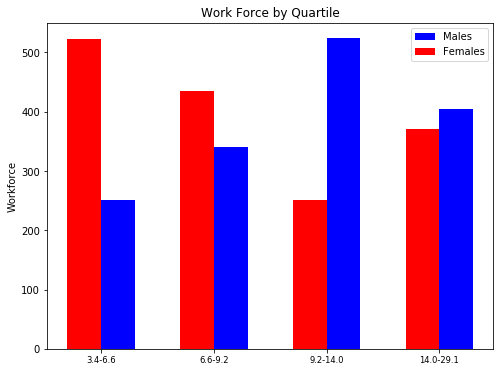

In [3]:
sample=PayGapVisualizer(pay, 37.5)
sample.plotWorkForce('Quartile')

For example, the graph above shows the male and female workforce by quartile. It looks like there are twice as many female members than men in the lower quartile, while the third quartile has twice as many male members. Overall, there are more females in the lower half of earnings (i.e. first 2 quartiles) than males, while for the upper half of earnings the situation is reversed.

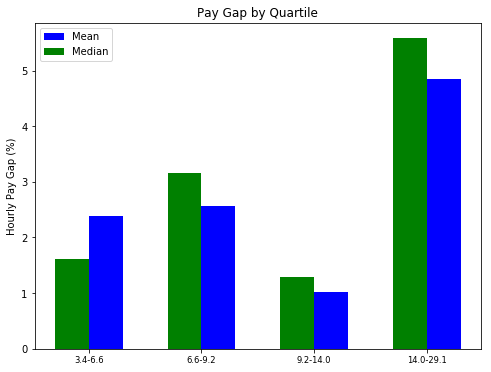

In [4]:
sample.plotPayGap('Quartile')

An interesting example is looking at the earnings and workforce grouped across each department.

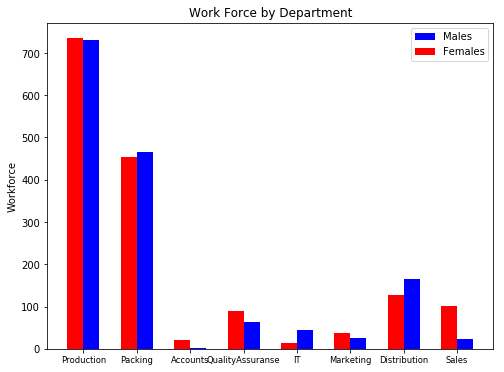

In [5]:
sample.plotWorkForce('Department')

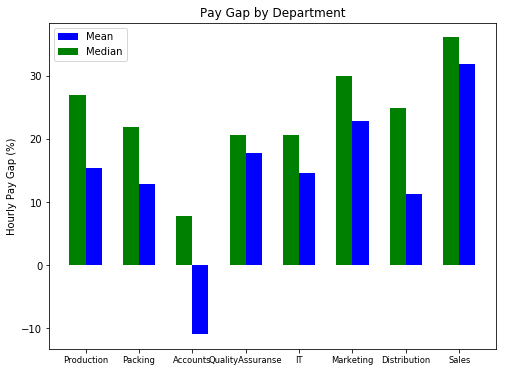

In [6]:
sample.plotPayGap('Department')

There is a large gender pay gap in the Sales department, even though women are the majority of employees working in this department. 

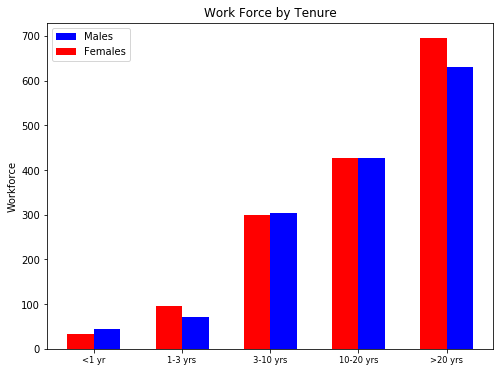

In [7]:
sample.plotWorkForce('Tenure')

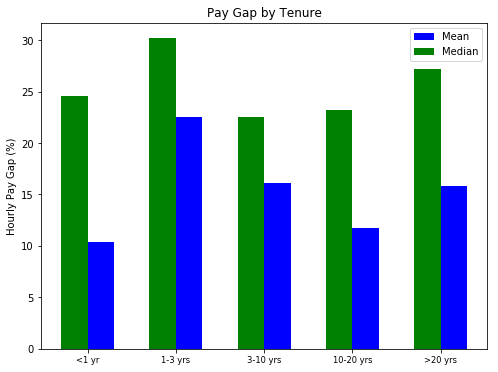

In [8]:
sample.plotPayGap('Tenure')

In each category of tenure length there are roughly the same number of male and female members (except for members with tenure length >20 yrs), yet there is quite a high gender pay gap median across all categories.

A positive pay gap mean means that on average, for a particular group, men earn more than women. A positive pay gap median means that, for a particular group, more than half of the women in the group earn less than the mens' 50 percentile earning. For example, looking at the Sales department in the sample dataset, we have 23 male employees and 102 female employees, and the gender pay gap median shows that 12 men (52% of men) earn more than 78 women (76% of women).

Another example (with more data points) showing the effect of the pay gap median is the Production department, which has roughly the same number of male and female employees, yet a pay gap median of over 25%. Plot the distribution of mens's and women's earnings:

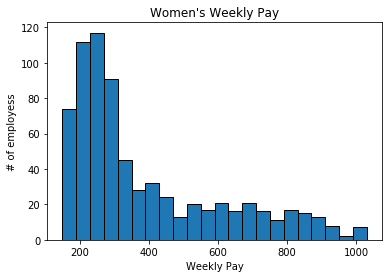

In [13]:
plt.hist(sample.females[sample.females.Department=='Production'].WeeklyPay, ec='black', bins=np.arange(150,1050,40))
plt.xlabel('Weekly Pay')
plt.ylabel('# of employess')
plt.title("Women's Weekly Pay")
plt.show()

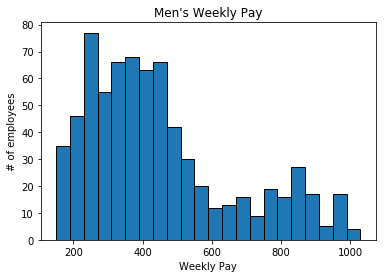

In [14]:
plt.hist(sample.males[sample.males.Department=='Production'].WeeklyPay, ec='black', bins=np.arange(150,1050,40))
plt.xlabel('Weekly Pay')
plt.ylabel('# of employees')
plt.title("Men's Weekly Pay")
plt.show()

Both histograms have the same horizontal axis. The distribution for women has more datapoints clustered in the low-paying region. It is easy to see, for example, that there are more women earning less than 300 pounds/week than men.